- Load the Data [DONE]
- Plot the Data [DONE]
- Feature Mapping [DONE]
- Cost Function & Gradient [DONE]
- Sklearn Function [DONE]
- Plotting the Decision Boundary [DONE]
- Accuracy of the Function [DONE]
- Clean Notebook [...]
- Update README.md [...]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

# Load Data

In [2]:
data = pd.read_csv('ex2.txt', header=None)
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [25]:
X = data.iloc[:, [0, 1]]
y = data.iloc[:, [2]]

# Plot the Data

In [4]:
def plotData(X, y):
    # Visualize Data
    pos = np.where(y == 1)
    neg = np.where(y == 0)

    plt.plot(X.iloc[pos[0]][0], X.iloc[pos[0]][1], 'k+', linewidth='2', markersize='7')
    plt.plot(X.iloc[neg[0]][0], X.iloc[neg[0]][1], 'ko', markerfacecolor='y', markersize='7')

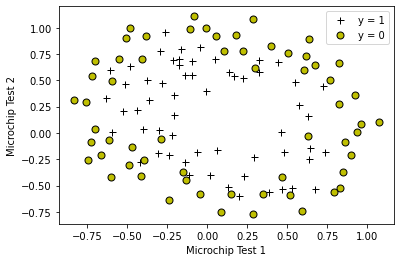

In [5]:
plotData(X, y)
# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])
plt.show()

# Feature Mapping

In [6]:
def mapFeature(X1, X2):
    m = X1.size
    
    degree = 6
    out = np.c_[np.ones(m)]
    
    for i in range(1, degree+1):
        for j in range(i+1):
            terms = (X1 ** (i - j) * X2 ** j)
            out = np.c_[out, terms]

    return out

In [7]:
X = mapFeature(X.iloc[:, 0], X.iloc[:, 1])

# Sigmoid Function

In [8]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

# Cost Function

In [9]:
def costFunction(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    
    J = 1/m * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))
    grad = (1/m) * X.T.dot(h-y)
    return J, grad

# Regularized Cost Function & Gradient

In [10]:
def costFuncReg(theta, X, y, lamb):
    
    m = len(y)
    [cost, desc] = costFunction(theta, X, y)
    grad = np.zeros_like(theta)
    # ignore theta_0
    theta = theta[1:, :]
    # regularized
    reg = lamb / (2*m) * np.sum(theta ** 2)
    J = cost + reg
    
    grad[0] = desc[0]
    grad[1:, :] = desc[1:, :] + (lamb/m) * theta
    return J, grad

In [11]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
lamb = 1

# Compute and display initial cost and gradient for regularized logistic regression
[z_cost, z_grad] = costFuncReg(initial_theta, X, y, 10)
print("Cost at Initial theta(zeros): {:.3f}".format(z_cost.iloc[0][0]))

Cost at Initial theta(zeros): 0.693


In [12]:
print('Gradient at initial theta (zeros) - first five values only:');
for i in range(5):
    print("{:.4f}".format(z_grad[i][0]))

Gradient at initial theta (zeros) - first five values only:
0.0085
0.0188
0.0001
0.0503
0.0115


In [13]:
# Compute and display cost and gradient with all-ones theta and lambda = 10
test_theta = np.ones((X.shape[1], 1))
[o_cost, o_grad] = costFuncReg(test_theta, X, y, 10)
print("Cost at test theta (with lambda=10): {:.2f}".format(o_cost.iloc[0][0]))

Cost at test theta (with lambda=10): 3.16


In [14]:
print('Gradient at test theta (zeros) - first five values only:');
for i in range(5):
    print("{:.4f}".format(o_grad[i][0]))

Gradient at test theta (zeros) - first five values only:
0.3460
0.1614
0.1948
0.2269
0.0922


# Sklearn Logistic Regression
- Figure this out, let's see if plot decision boundary is the same with MATLAB coursera

In [15]:
y = data.iloc[:, 2]
log_reg = LogisticRegression()
log_reg.fit(X, y)
log_reg.intercept_[0], log_reg.coef_[0][0]

(1.2728172663907045, -9.403168960635822e-05)

In [16]:
log_reg.coef_[0][0] = log_reg.intercept_[0]

In [17]:
theta = log_reg.coef_.T

In [18]:
for i in range(5):
    print("{:.4f}".format(log_reg.coef_[0][i]))

1.2728
0.6252
1.1811
-2.0200
-0.9174


# Plot Decision Boundary

In [19]:
def plotDecBoundary(theta, X, y):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    
    z = np.zeros((len(u), len(v)))
    
    for i in range(len(u)):
        for j in range(len(v)):
            z[i, j] = mapFeature(u[i], v[j]).dot(theta)
            
    z = z.T
    plt.contour(u, v, z, [0][0])
            

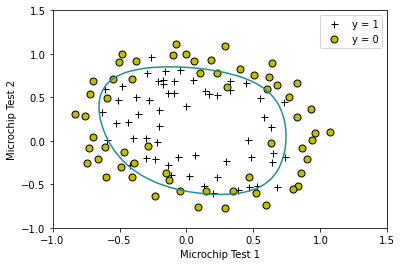

In [20]:
plotData(data.iloc[:, [0, 1]], y)
plotDecBoundary(theta, data.iloc[:, [0, 1]], y)
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(['y = 1', 'y = 0', 'Decision boundary'])
plt.show()

# Predicition Accuracy

In [21]:
log_reg.score(X, y)

0.6186440677966102

In [22]:
ss = sigmoid(X.dot(theta))
ss = ss >= 0.5

In [23]:
accuracy = np.mean(ss == data.iloc[:, [2]]) * 100
print("Train Accuracy: {:.6f}".format(accuracy.iloc[0]))

Train Accuracy: 83.050847


# scipy.optimize.fmin_bfgs
Learn how to use this, rewrite it to another notebook
This is basically the fminunc of python
Use the same data for testing

In [24]:
X.shape

(118, 28)